In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:41<00:00, 115MB/s]
100% 2.29G/2.29G [00:41<00:00, 58.9MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/chest-xray-pneumonia.zip','r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/chest-xray-pneumonia.zip' mode='r'>>

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                       

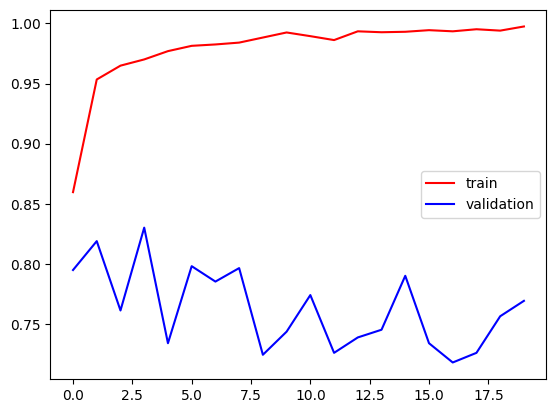

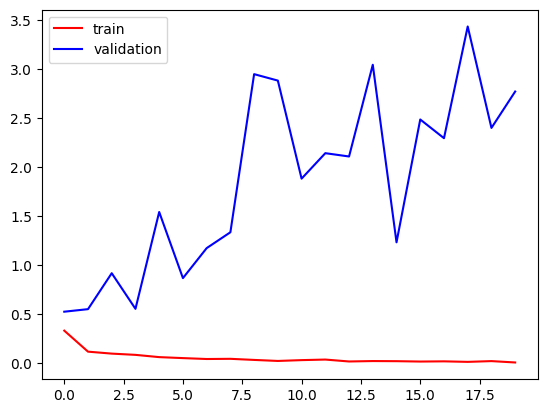

In [5]:
#question3
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/chest_xray/chest_xray/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)
valid_ds=keras.utils.image_dataset_from_directory(
    directory='/content/chest_xray/chest_xray/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label
train_ds=train_ds.map(process)
valid_ds=valid_ds.map(process)


model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_ds,epochs=20,validation_data=valid_ds)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()